# Imports

In [1]:
# data
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# model
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
# evaluation
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
dataset = load_boston()

In [3]:
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
y = pd.Series(dataset['target'], name='Price')

In [4]:
X.shape, y.shape

((506, 13), (506,))

In [5]:
def train_validate_test_split(X, y, *args, **kwargs):  
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, *args, **kwargs)    
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, *args, **kwargs)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y, random_state=42)

In [7]:
print([itm.shape for itm in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(284, 13), (95, 13), (127, 13), (284,), (95,), (127,)]


# Preview

In [8]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
427,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23


In [10]:
y_train.head()

370    50.0
427    10.9
494    24.5
141    14.4
458    14.9
Name: Price, dtype: float64

Analysis the missing values and unique values

In [11]:
def show_missing_info(data):
    return pd.DataFrame({
        'isnull': data.isnull().sum(),
        'nunique': data.nunique(),
        'dtypes': data.dtypes,
    })

In [12]:
show_missing_info(X_train)

,isnull,nunique,dtypes
CRIM,0,283,float64
ZN,0,24,float64
INDUS,0,67,float64
CHAS,0,2,float64
NOX,0,78,float64
RM,0,266,float64
AGE,0,231,float64
DIS,0,249,float64
RAD,0,9,float64
TAX,0,59,float64


All features are numerical and contain no missing values.

# Preprocessing

All X feature columns are numerical and contains no missing values, and y label are categorical, therefore no preprocessing is need.

# Model

In [13]:
model = RandomForestRegressor(n_estimators=100)

In [14]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

In [16]:
print(f'Validation MAE: {val_mae:.6f}')

Validation MAE: 2.965537


# Evaluation 

In [17]:
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [18]:
print(f'Test MAE: {test_mae:.6f}')

Test MAE: 2.148236


In [19]:
print(f'y_test mean: {np.mean(y_test):.6f}, std: {np.std(y_test):.6f}')

y_test mean: 21.413386, std: 8.368222


Text(0.5, 0.98, 'y_test vs y_test_pred')

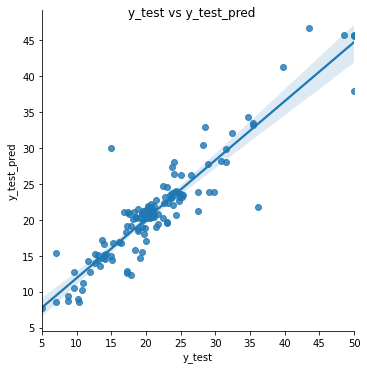

In [20]:
y_test_vs_pred = pd.concat([
    pd.Series(y_test, name='y_test'), 
    pd.Series(y_test_pred, name='y_test_pred', index=y_test.index),
], axis=1)
sns.lmplot(x='y_test', y='y_test_pred', data=y_test_vs_pred).\
    fig.suptitle('y_test vs y_test_pred')

In [21]:
y_test_vs_pred.corr()

,y_test,y_test_pred
y_test,1.000000,0.924894
y_test_pred,0.924894,1.000000


# Application

In [22]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    print(X_test.iloc[idx])
    print(f'\nModel forecasted as {model.predict(X_test.iloc[idx:idx+1])[0]:.6f}')
    print(f'\nActual data should be {y_test.iloc[idx]:.6f}')

In [23]:
application()

Collected new features as follows:
CRIM         8.05579
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.58400
RM           5.42700
AGE         95.40000
DIS          2.42980
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          352.58000
LSTAT       18.14000
Name: 474, dtype: float64

Model forecasted as 14.646000

Actual data should be 13.800000
